# Bayesian signal reconstruction with Gaussian Random Fields (Wiener Filtering)

In [3]:
import numpy as np
import scipy.linalg
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
n=1000
epsilon=0.000000000001

## Setup signal covariance

In [4]:
t=np.array([100./(f*f) for f in xrange(1,n/2)])
signalcovar=np.concatenate([np.zeros(1),t,t[::-1],np.zeros(1)])

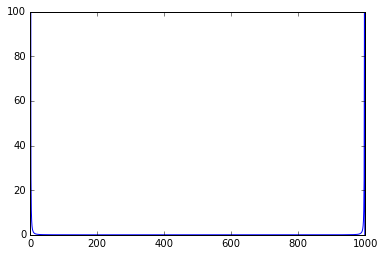

In [5]:
plt.plot(np.arange(n),signalcovar)

In [10]:
sqrtsignalcovar=np.diagflat(np.sqrt(signalcovar))
sqrtsignalcovarPix=np.fft.ifft(np.fft.fft(sqrtsignalcovar).T).T

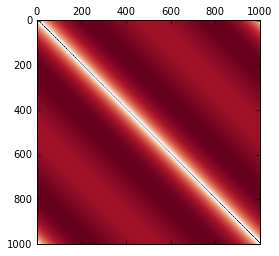

In [11]:
plt.matshow(sqrtsignalcovarPix.real, cmap='RdBu')

## Setup mask

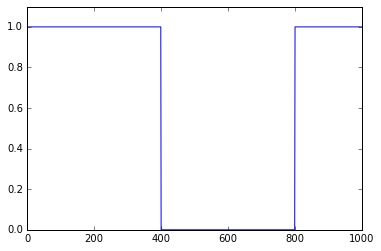

In [7]:
mask=np.ones(n)
mask[400:800]=0.
plt.ylim(0,1.1)
plt.plot(np.arange(n),mask)

## Setup noise covariance

In [8]:
noisepower=0.00001
noisecovar=noisepower*np.concatenate([np.ones(n/2),10000*np.ones(n/2)])

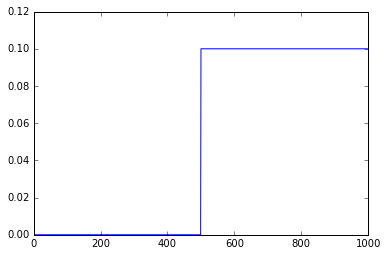

In [9]:
plt.plot(np.arange(n),noisecovar)

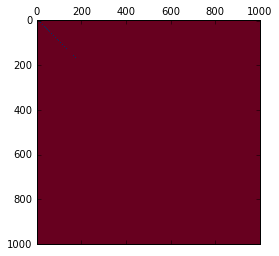

In [10]:
invnoisecovarmat=np.diagflat(mask/noisecovar)
plt.matshow(invnoisecovarmat, cmap='RdBu')

## Generate mock data

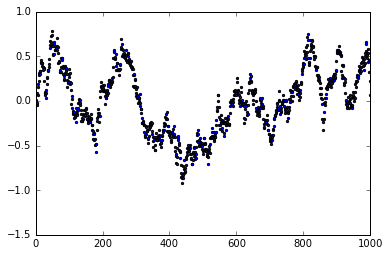

In [11]:
#The truth
normalsim=np.random.normal(0.,1.,1000)
trues=sqrtsignalcovarPix.real.dot(normalsim)
plt.xlim(0.,1000.)
plt.scatter(np.arange(n),trues,marker='.')

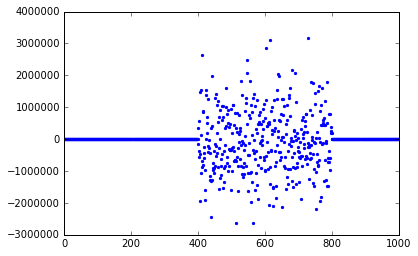

In [12]:
#Infinite variance in masked regions
v=trues+normalsim/np.sqrt(np.diag(invnoisecovarmat)+epsilon)
plt.xlim(0.,1000.)
plt.scatter(np.arange(n),v,marker='.',color='blue')

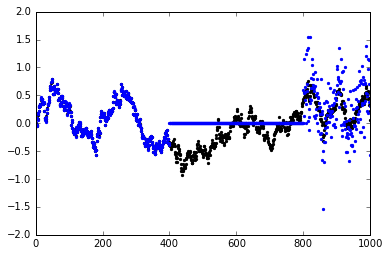

In [13]:
plt.xlim(0.,1000.)
plt.scatter(np.arange(n),trues,marker='.',color='black')
plt.scatter(np.arange(n),mask*v,marker='.',color='blue')

## Setup Wiener Filter

In [20]:
M=np.identity(n)+sqrtsignalcovarPix.dot(invnoisecovarmat).dot(sqrtsignalcovarPix)
CovWF=sqrtsignalcovarPix.dot(np.linalg.inv(M)).dot(sqrtsignalcovarPix)
sWF=CovWF.dot(invnoisecovarmat).dot(v).real

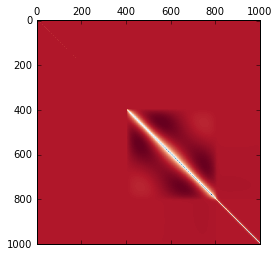

In [15]:
CovWF=(CovWF+CovWF.T)/2
sqrtCovWf=scipy.linalg.sqrtm(CovWF)
plt.matshow(sqrtCovWf.real, cmap='RdBu')

## Perform signal reconstruction (apply Wiener Filtering)

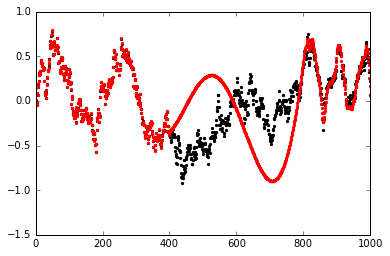

In [19]:
plt.xlim(0.,1000.)
plt.scatter(np.arange(n),trues,marker='.',color='black')
plt.scatter(np.arange(n),sWF,marker='.',color='red')

## Generate constrained realizations (draw samples from the Wiener posterior)

In [17]:
cr1=sqrtCovWf.dot(np.random.normal(0.,1.,1000))+sWF
cr2=sqrtCovWf.dot(np.random.normal(0.,1.,1000))+sWF
cr3=sqrtCovWf.dot(np.random.normal(0.,1.,1000))+sWF

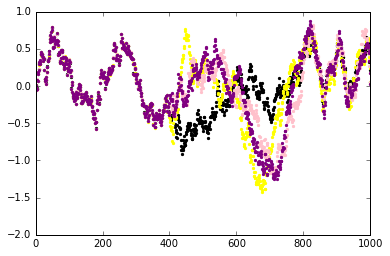

In [18]:
plt.xlim(0.,1000.)
plt.scatter(np.arange(n),trues,marker='.',color='black')
plt.scatter(np.arange(n),cr1,marker='.',color='yellow')
plt.scatter(np.arange(n),cr2,marker='.',color='pink')
plt.scatter(np.arange(n),cr3,marker='.',color='purple')